Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.


The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. What's the distribution of the target, `price`, and features such as `longitude` and `latitude`? Remove outliers.
- [ ] After you remove outliers, what is the mean price in your subset of the data?
- [ ] Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?
- [ ] Do the [Plotly Dash](https://dash.plot.ly/) Tutorial, Parts 1 & 2.

In [0]:
# If you're in Colab...
'''
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module1')
'''

In [1]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [2]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [11]:
# Record amenity variables for further analysis.  Will remove from dataset until processing
amenities = df.columns[11:]
df[amenities].dtypes

cats_allowed            int64
hardwood_floors         int64
dogs_allowed            int64
doorman                 int64
dishwasher              int64
no_fee                  int64
laundry_in_building     int64
fitness_center          int64
pre-war                 int64
laundry_in_unit         int64
roof_deck               int64
outdoor_space           int64
dining_room             int64
high_speed_internet     int64
balcony                 int64
swimming_pool           int64
new_construction        int64
terrace                 int64
exclusive               int64
loft                    int64
garden_patio            int64
wheelchair_access       int64
common_outdoor_space    int64
dtype: object

In [29]:
# Create truncated dataset dfa with price, longitute, latitude 
dfa = df[['price', 'longitude', 'latitude']].copy()
dfa.describe()

price     longitude      latitude
count  4.935200e+04  49352.000000  49352.000000
mean   3.830174e+03    -73.955716     40.741545
std    2.206687e+04      1.177912      0.638535
min    4.300000e+01   -118.271000      0.000000
25%    2.500000e+03    -73.991700     40.728300
50%    3.150000e+03    -73.977900     40.751800
75%    4.100000e+03    -73.954800     40.774300
max    4.490000e+06      0.000000     44.883500

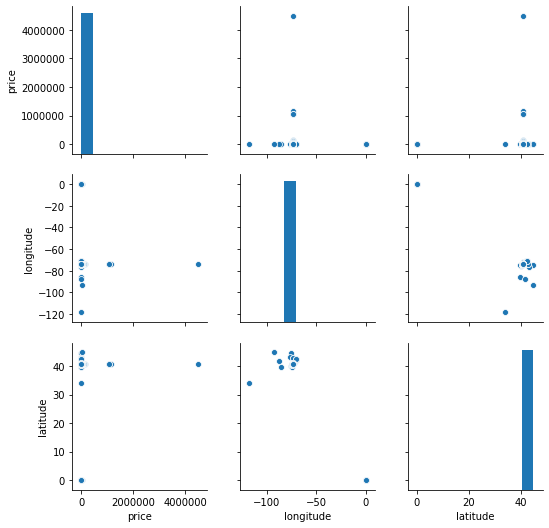

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dfa)
plt.show()

In [31]:
# Regioinally, there seems to be an outlier at lat,long: (0,0).  There also seems to be an expensive house in the 40M range. 
# Looking at the price first
df.query('price > 3000000')

bathrooms  bedrooms              created description display_address  \
19558        1.0         2  2016-06-24 05:02:11         NaN   Hudson Street   

       latitude  longitude    price     street_address interest_level  ...  \
19558   40.7299   -74.0071  4490000  421 Hudson Street            low  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
19558                    0        0              0                 0        0   

       exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
19558          1     0             0                  0                     0  

[1 rows x 34 columns]

In [91]:
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

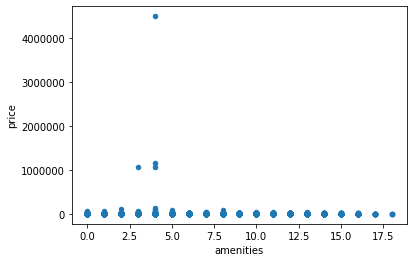

In [35]:
# At Hudson Street, there is a 4.5mm house with no amenities.  Let's represent amenities/price and see what comes out.
dfa['amenities'] = df.iloc[:, 11:].sum(axis=1)

dfa.plot(x='amenities', y='price', kind='scatter')

In [36]:
# The hudson house sits high as the only property agove 4M. The 1M homes don't seem to follow a trend based on amenities.
# It is worthwhile to look at them as well and see how many the set contains.

df.query('price > 1000000')

bathrooms  bedrooms              created  \
9590         1.0         2  2016-06-24 05:02:58   
19558        1.0         2  2016-06-24 05:02:11   
29665        1.0         1  2016-05-14 05:21:28   
30689        1.0         1  2016-05-19 02:37:06   

                                             description    display_address  \
9590                                                 NaN  West 116th Street   
19558                                                NaN      Hudson Street   
29665                                                      West 57th Street   
30689  This 1 Bedroom apartment is located on a prime...   West 57th Street   

       latitude  longitude    price        street_address interest_level  ...  \
9590    40.8011   -73.9480  1150000  40 West 116th Street            low  ...   
19558   40.7299   -74.0071  4490000     421 Hudson Street            low  ...   
29665   40.7676   -73.9844  1070000  333 West 57th Street            low  ...   
30689   40.7676   -73.9844  1070000  333 West 57th Street            low  ...   

       high_speed_internet  balcony  swimming_pool  new_construction  terrace  \
9590                     0        0              0                 0        0   
19558                    0        0              0                 0        0   
29665                    0        0              0                 0        0   
30689                    0        0              0                 0        0   

       exclusive  loft  garden_patio  wheelchair_access  common_outdoor_space  
9590           1     0             0                  0                     0  
19558          1     0             0                  0                     0  
29665          0     0             0                  0                     0  
30689          0     0             0                  0                     0  

[4 rows x 34 columns]

In [51]:
dfa.price.describe()

count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64

In [54]:
# All of these homes have low intere_level and few amenities.  They are also 1 bath 1 or 2 bedroom homes.
# To check intuition, I'll run a 1 sample ttest to see if homes over 500K belong in this dataset

from scipy import stats
stats.ttest_1samp(dfa.price, 500000)

Ttest_1sampResult(statistic=-4995.075681321818, pvalue=0.0)

In [55]:
# Looks like we can safely exclude those points
dfa = dfa[dfa.price < 500000]

price  longitude  latitude  amenities
0   3000   -73.9425   40.7145          0
1   5465   -73.9667   40.7947          4
2   2850   -74.0018   40.7388          3
3   3275   -73.9677   40.7539          2
4   3350   -73.9493   40.8241          1

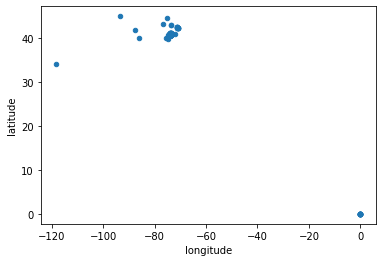

In [68]:
# Looking again at longitude and lattitude
dfa.plot(x='longitude', y='latitude', kind='scatter')

In [66]:
# It seems like there are some groups it might be useful to label.  I see about 4 distinct objects. 
# Kmeans might yield some interesting information in checking mean pricing/amenities

from sklearn.cluster import KMeans
import numpy as np

X = dfa[['latitude', 'longitude']].to_numpy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
dfa['labels'] = kmeans.labels_

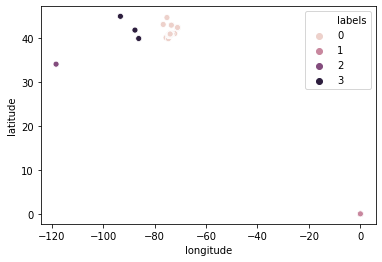

In [67]:
# Plot again with labels
sns.scatterplot(x='longitude', y='latitude', data=dfa, hue='labels')

In [73]:
# Since we have the label, we can take a look at those homes
from IPython.display import display
display(dfa.query('labels == 1'),dfa.query('labels == 2'))

price  longitude  latitude  amenities  labels
2787    9995        0.0       0.0          6       1
14104   1750        0.0       0.0          0       1
21715   1725        0.0       0.0          1       1
22471   4395        0.0       0.0          6       1
25860   2950        0.0       0.0          2       1
27181   3619        0.0       0.0          5       1
33286  16500        0.0       0.0          7       1
34390   3600        0.0       0.0          5       1
35826   3200        0.0       0.0          4       1
36448   3495        0.0       0.0          1       1
39199   3200        0.0       0.0          4       1
42987   1850        0.0       0.0          0       1

price  longitude  latitude  amenities  labels
22767   2425   -118.271   34.0126          2       2

In [75]:
# Cluster 2 doesn't bother me so much.  House 33286 in cluster 1 seems too high.  Let's run another 1 sample to see if it fits
subsample_1 = dfa[dfa.labels == 1]
stats.ttest_1samp(subsample_1.price, 16500)

Ttest_1sampResult(statistic=-9.489855585146614, pvalue=1.2443560173327962e-06)

In [76]:
# This is significant.  It is throwing off my data for the cluster.  I will drop any homes in cluster 1 (1 entry) where
# price > $15,000, even with its 7 amenities. I will leave the 10000 home with six amenities.  

dfa = dfa.drop(33286)
dfa[dfa.labels == 1]

price  longitude  latitude  amenities  labels
2787    9995        0.0       0.0          6       1
14104   1750        0.0       0.0          0       1
21715   1725        0.0       0.0          1       1
22471   4395        0.0       0.0          6       1
25860   2950        0.0       0.0          2       1
27181   3619        0.0       0.0          5       1
34390   3600        0.0       0.0          5       1
35826   3200        0.0       0.0          4       1
36448   3495        0.0       0.0          1       1
39199   3200        0.0       0.0          4       1
42987   1850        0.0       0.0          0       1

In [85]:
# The new mean price:
dfa.groupby('labels').mean()

price   longitude   latitude  amenities
labels                                               
0       3672.454391  -73.971889  40.751503   4.146132
1       3616.272727    0.000000   0.000000   3.090909
2       2425.000000 -118.271000  34.012600   2.000000
3       6175.000000  -89.012200  42.158667   2.000000

In [86]:
# Cluster 3 is exhibiting some odd behavior.  It's geographically different than the others and homes are nearly
# twice as expensive with fewer amenities.  

dfa[dfa.labels == 3].count()

price        3
longitude    3
latitude     3
amenities    3
labels       3
dtype: int64

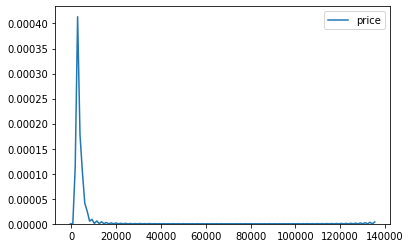

In [84]:
# Quickly check the new distribution of price
ax = sns.kdeplot(dfa.price)

In [88]:
# A plotly express plot
import plotly.express as px
fig = px.scatter_3d(dfa, x="longitude", y='latitude', z="price")
fig.show()

In [89]:
# In 3d, it seems like the 0,0 region is seriously a different area alltogether, corresponding to label 1
# It may be that the latitude and longitude were not reported correctly there.

# I will subset dfa into dfb where label 1 is not included and replot.
dfb = dfa[dfa.labels != 1]
dfb.price.mean()

3672.5812793903033

In [90]:
# mean price was not impacted much.  Running the 3d plot again:
fig = px.scatter_3d(dfb, x="longitude", y='latitude', z="price")
fig.show()

In [96]:
# Before regressing, I'd like to add back some ordinal variables, namely bedrooms and bathrooms.
dfa = dfa.join(df[['bathrooms', 'bedrooms']])
dfb = dfb.join(df[['bathrooms', 'bedrooms']])

dfa.head()

price  longitude  latitude  amenities  labels  bathrooms  bedrooms
0   3000   -73.9425   40.7145          0       0        1.5         3
1   5465   -73.9667   40.7947          4       0        1.0         2
2   2850   -74.0018   40.7388          3       0        1.0         1
3   3275   -73.9677   40.7539          2       0        1.0         1
4   3350   -73.9493   40.8241          1       0        1.0         4

In [97]:
# For analysis now, reducing total number of amenities by bathrooms + bedrooms
work_list = [dfa,dfb]
for df in work_list:
    df['amenities'] = df['amenities'] - (df['bathrooms'] + df['bedrooms'])

In [106]:
# Setting up regressions
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

features_all = ['longitude', 'latitude', 'bathrooms', 'bedrooms', 'amenities']
features_short = ['bathrooms', 'bedrooms', 'amenities']
target = ['price']

# Training on dfa
X = dfa[features_short].to_numpy()
y = dfa[target].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
# Check split
display(len(X), len(X_train))

49347

33062

In [111]:
# Fit model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [[2757.41608879  397.08149296   73.40254705]]
Mean squared error: 3583998.01
Variance score: 0.43


In [147]:
# Hmm. Well let's see how we did visually.
# Given a 2 bedroom, 2 bathroom place:

# First a prediction function
def modelPrice(amenities, bathrooms=2, bedrooms=2):
    return model.predict(np.array([[bathrooms, bedrooms, amenities]]))[0][0]

df_test = dfa[(dfa.bathrooms == 2) & (dfa.bedrooms == 2)]
df_test['pred_val'] = df_test.amenities.apply(modelPrice)
df_test.head()

C:\Users\vince\Anaconda3\envs\datasc\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



price  longitude  latitude  amenities  labels  bathrooms  bedrooms  \
13   6895   -73.9817   40.7707        2.0       0        2.0         2   
29   5600   -73.9506   40.7716        2.0       0        2.0         2   
38   6500   -73.9867   40.7471        3.0       0        2.0         2   
55   2100   -73.8339   40.7059       -4.0       0        2.0         2   
68   5700   -73.9896   40.7341        2.0       0        2.0         2   

       pred_val  
13  6062.681334  
29  6062.681334  
38  6136.083882  
55  5622.266052  
68  6062.681334

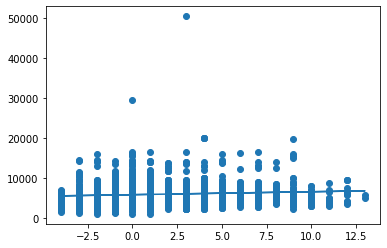

In [155]:
fig, ax = plt.subplots()
ax.scatter(x=df_test.amenities, y=df_test.price)
ax.plot(df_test.amenities, df_test.pred_val)

In [156]:
# Intersting.  The prediction is flat on the 2bed, 2bath slice.  Amenities don't seem to matter much.
# There are still outliers here.  Clustering by label might give a better picture.

In [157]:
# We can also hold amenities at say 0 and bedrooms at 2, and see how bathrooms impact us.

def modelPrice(amenities=0, bathrooms=2, bedrooms=2):
    return model.predict(np.array([[bathrooms, bedrooms, amenities]]))[0][0]

df_test = dfa[(dfa.amenities == 0) & (dfa.bedrooms == 2)]
df_test['pred_val'] = df_test.amenities.apply(modelPrice)
df_test.head()

C:\Users\vince\Anaconda3\envs\datasc\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



price  longitude  latitude  amenities  labels  bathrooms  bedrooms  \
6    3600   -73.9660   40.8012        0.0       0        1.0         2   
34   2300   -73.9404   40.8440        0.0       0        1.0         2   
71   3200   -73.9648   40.8028        0.0       0        1.0         2   
75   7800   -73.9741   40.7924        0.0       0        2.0         2   
84   3095   -73.9715   40.7931        0.0       0        1.0         2   

      pred_val  
6   5915.87624  
34  5915.87624  
71  5915.87624  
75  5915.87624  
84  5915.87624

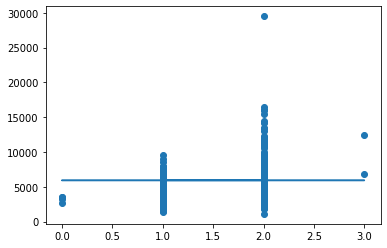

In [158]:
fig, ax = plt.subplots()
ax.scatter(x=df_test.bathrooms, y=df_test.price)
ax.plot(df_test.bathrooms, df_test.pred_val)

In [ ]:
# Ah.  Now it looks like the regression isn't working well.  The model is effectively flat here.
# Something is off.  Refitting in 2-d (multiple models), then manual linear combination with weights might be a better option.S